1\. Write a function that converts number representation (bin<->dec<->hex)

**The following two functions tackle every base: once we finish the alphabet, arriving at Z, the symbols A. all the way to Z. will be created. Then we go to A.. and so on**

In [34]:
base = input("What is the base? ")
number = input(f"""Insert your number to be converted to decimal,
if you wanna convert a negative number, just type - in front of the absolute value of the number,
if you wanna convert a positive number, just type it without the plus in front of it:\n >  """)
def every_base_to_dec(base_number, base_used):
    # Here we raise an error if the base typed is not convertible to an integer
    try:
        final_base = int(base_used)
    except ValueError:
        raise Exception("Remember, the base must be an integer number") from None
    # Here we raise an error if the base is negative
    if final_base <= 0:
        raise ValueError("Remember, the base must be a positive integer number") from None
    number_used = base_number.upper()
    alphabet = list(string.ascii_uppercase)
    alphabets_needed = ((final_base - 10) // 26)
    conversion = {}
    list_of_symbols = [str(x) for x in range(10) if x < final_base]
    # Here we fill the list_of_symbols list with the right amount of symbols we need
    for i in range(alphabets_needed+1):
        for item in alphabet:
            if alphabet.index(item)+(len(alphabet)*i) + 10 < final_base:
                list_of_symbols.append(f"{item}" + ("." * i))
    # Here we put in the dictionary all the conversions from symbols to decimals
    for i in list_of_symbols:
        conversion[i] = list_of_symbols.index(i)
    decimal_number = 0
    character_used = []
    sign = ""
    start_index = 0
    if number_used[0] == "-":
        start_index = 1
        sign = "-"
    # Here we catch an error if the number variable typed was not valid
    for i in number_used[start_index:]:
        if i != "." and i not in alphabet and i not in conversion:
            raise ValueError("You didn't type a valid number") from None
    for i in range(start_index, len(number_used) - 1):
        if number_used[i] != "." and number_used[i + 1] == ".":
            for j in range(i + 1, len(number_used)):
                if number_used[j] != ".":
                    character_used.append(number_used[i:j])
                    break
        elif number_used[i] != "." and number_used[i + 1] != ".":
            character_used.append(number_used[i])
        # This error would not be caught with the other raise Exceptions in the code
        elif number_used[start_index] == ".":
            raise Exception("You didn't type a valid number")
    if number_used[len(number_used) - 1] != ".":
        character_used.append(number_used[len(number_used) - 1].upper())
    elif number_used[len(number_used) - 1] == ".":
        for i in range(len(number_used)):
            if number_used[::-1][i] != ".":
                character_used.append(number_used[len(number_used) - 1 - i:].upper())
                break
    # The part beginning at line 34, raising an error if the number typed is not the proper one, does not catch an 
    # error if we type something higher than the base composed only by letters and dots: for example A..... with 
    # base 89, we catch this error now when we already filled the character_used list
    for item in character_used:
        if item not in conversion:
            raise ValueError("You didn't type a valid number")
    for i in range(len(character_used)):
        decimal_number += int(conversion[character_used[::-1][i]]) * (final_base ** i)
    return sign + str(decimal_number)


print("The result is: \n", every_base_to_dec(number, base))

What is the base? 89
Insert your number to be converted to decimal,
if you wanna convert a negative number, just type - in front of the absolute value of the number,
if you wanna convert a positive number, just type it without the plus in front of it:
 >  A..B..
The result is: 
 5581


In [39]:
base = input("What is the base you want to convert the decimal number in? ")
number = input("Insert your decimal number to be converted: ")


def dec_to_every_base(decimal_number, base_used):
    # Here we catch an error if the base or the number typed are not valid
    try:
        final_base = int(base_used)
        int(decimal_number)
    except ValueError:
        raise Exception("""Remember, the base must be an integer number and the positive number to
        convert must be an integer number""") from None
        # Here we raise an error if the base is negative
    if final_base <= 0:
        raise ValueError("Remember, the base must be a positive integer number") from None
    alphabets_needed = ((final_base - 10) // 26)
    alphabet = list(string.ascii_uppercase)
    list_of_symbols = [str(x) for x in range(10) if x < final_base]
    conversion = {}
    # Here we fill the list_of_symbols list with the right amount of symbols we need
    for i in range(alphabets_needed + 1):
        for item in alphabet:
            if alphabet.index(item) + (len(alphabet) * i) + 10 < final_base:
                list_of_symbols.append(f"{item}" + ("." * i))
    for i in range(len(list_of_symbols)):
        conversion[i] = list_of_symbols[i]
    sign = ""
    start_index = 0
    if decimal_number[0] == "-":
        sign = "-"
        start_index = 1
        decimal_used = int(decimal_number[start_index:])
    else:
        decimal_used = int(decimal_number)
    final_number = ""
    while decimal_used > 0:
        final_number += conversion[decimal_used % final_base]
        decimal_used //= final_base
    final_list = []
    for i in range(len(final_number) - 1):
        if final_number[i] != "." and final_number[i + 1] == ".":
            for j in range(i + 1, len(final_number)):
                if final_number[j] != ".":
                    final_list.append(final_number[i:j])
                    break
        elif final_number[i] != "." and final_number[i + 1] != ".":
            final_list.append(final_number[i])
    if final_number[len(final_number) - 1] != ".":
        final_list.append(final_number[len(final_number) - 1].upper())
    elif final_number[len(final_number) - 1] == ".":
        for i in range(len(final_number)):
            if final_number[::-1][i] != ".":
                final_list.append(final_number[len(final_number) - 1 - i:].upper())
                break
    final_string = ""
    for i in range(len(final_list)):
        final_string += final_list[::-1][i]
    return sign + final_string


print("The result is: ", dec_to_every_base(number, base))



What is the base you want to convert the decimal number in? 89
Insert your decimal number to be converted: 5581
The result is:  A..B..


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [15]:
number = input("What is your floating point you wanna convert?\n> ")


def floating_point_single(floating):
    # Here we raise an error if the float is not 32 numbers long
    if len(floating) != 32:
        raise Exception("Your single precision floating number must be 32 figure long")
    # Here we raise an exception if thr float typed is not composed by zeros and ones
    for item in floating:
        if int(item) != 0 and int(item) != 1:
            raise Exception("The floating number must be composed only by either 0s or 1s")
    fractional_part = 0
    exponent = 0
    sign = 1
    if floating[0] == "1":
        sign = -1
    for i in range(0, 23):
        fractional_part += (int(floating[9 + i])) * (2 ** (-(i + 1)))
    for i in range(8):
        exponent += int(floating[8:0:-1][i]) * (2 ** i)
    return sign*(1+fractional_part)*(2**(exponent-127))


print("The converted number is: ", floating_point_single(number))

What is your floating point you wanna convert?
> 11000010111011010100000000000000
The converted number is:  -118.625


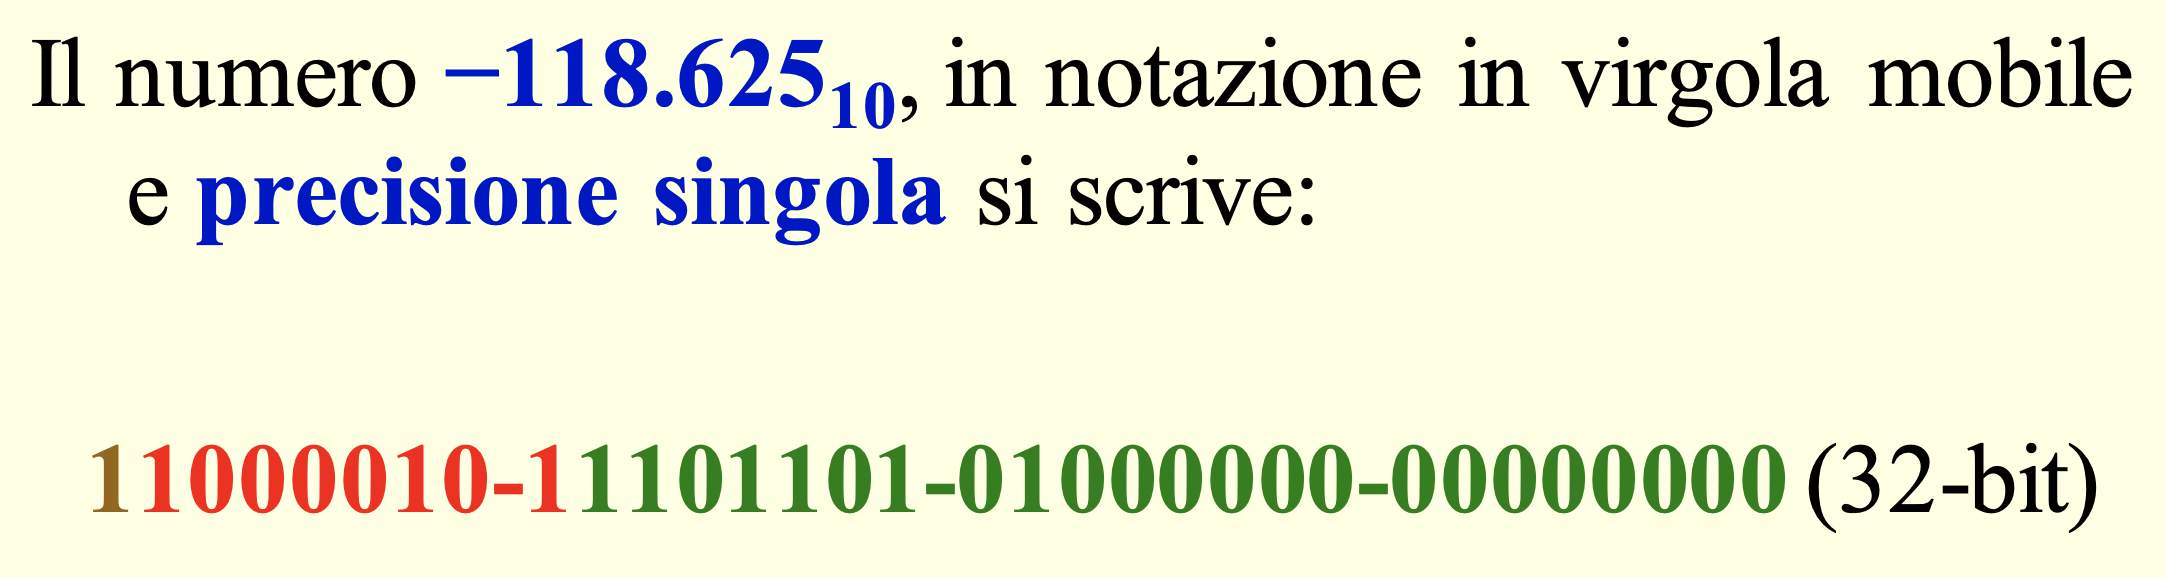

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [9]:
import math
overflow_var = 1.0
underflow_var = 1
# We initialize underflow_count at -1 so that we can print the last value different from zero of underflow var
underflow_count = 0
# We initialize overflow_count at -1 similarly at what we have done for underflow_count
overflow_count = 0
while underflow_var != 0:
    underflow_var /= 2
    underflow_count += 1
print("The lowest power of 2 achievable is 2 to the power of", -underflow_count, "=", 2**(-underflow_count+1))
while overflow_var < math.inf:
    overflow_var *= 2
    overflow_count += 1.0
print("The highest power of 2 achievable is 2 to the power of", overflow_count, "=", 2**(overflow_count-1))

The lowest power of 2 achievable is 2 to the power of -1075 = 5e-324
The highest power of 2 achievable is 2 to the power of 1024.0 = 8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [10]:
auxiliary_variable = 1
i = 1
while auxiliary_variable != (auxiliary_variable + 2**(-i)):
    auxiliary_variable += 2**(-i)
    i += 1

print("The first addition not detected is: ", 2**(-i))

The first addition not detected is:  5.551115123125783e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [11]:
import math


def quadratic_solver(a, b, c):
    delta = (b**2-4*a*c)
    x_1 = (-b + math.sqrt(delta)) / (2 * a)
    x_2 = (-b - math.sqrt(delta))/(2*a)
    y_1 = (2*c)/(a*(-b - math.sqrt(delta)))
    y_2 = (2*c)/(a*(-b + math.sqrt(delta)))
    z_1 = 2*c / (a*(-b - math.sqrt(delta)))
    z_2 = (-b - math.sqrt(delta))/(2*a)
    return f"""The solutions for the first formula are {x_1} and {x_2}, 
    for the second formula {y_1} and {y_2}, 
    for the third {z_1} and {z_2}"""


print(quadratic_solver(0.001, 1000, 0.001))

The solutions for the first formula are -9.999894245993346e-07 and -999999.999999, 
    for the second formula -0.001000000000001 and -1000010575.5125058, 
    for the third -0.001000000000001 and -999999.999999


We have that in both the first and second formula, catastrophic cancellation happens for one of the two solutions. We have that b and sqrt(b^2-4ac) are very close number and problems occur taking the difference between the two of them.
In the formulas written for the z_1 and z_2 solution we take the previous ones if they don't involve the subtraction causing catastrophic cancellation.

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [12]:
def f(x):
    return x*(x-1)


def f_prime(x):
    return 2*x-1


def incremental_limit(x, delta):
    return (f(x+delta) - f(x))/delta


# We define the accuracy
def accuracy(x, delta):
    return abs(f_prime(x) - incremental_limit(x, delta))


print("The function in 1, takes the value of: ", f(1))
print("The derivative of the function in 1, takes the value of: ", f_prime(1))
print("The incremental limit, with delta = {10**(-2)} is: ", incremental_limit(1, 10**(-2)))
for i in range(2, 15, 2):
    print("For delta =", 10**-i, "the relative accuracy is", accuracy(1, 10**(-i)))

The function in 1, takes the value of:  0
The derivative of the function in 1, takes the value of:  1
The incremental limit, with delta = {10**(-2)} is:  1.010000000000001
For delta = 0.01 the relative accuracy is 0.010000000000000897
For delta = 0.0001 the relative accuracy is 9.999999988985486e-05
For delta = 1e-06 the relative accuracy is 9.99917733279787e-07
For delta = 1e-08 the relative accuracy is 3.922528746258536e-09
For delta = 1e-10 the relative accuracy is 8.284037100736441e-08
For delta = 1e-12 the relative accuracy is 8.890058334132256e-05
For delta = 1e-14 the relative accuracy is 0.0007992778373491216


We see the accuracy hitting a minimum value for delta ~ 10^(-8) and then it starts increasing again: the two results are not equal because in the derivative definition delta tends to zero, in the incremental limit computed delta = 10^(-2).

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [13]:
import math
import time


def semicircle(x):
    return math.sqrt(1 - (x**2))


def riemann_integral(n_slices):
    integral_value = 0
    for i in range(1, n_slices + 1):
        integral_value += (2 / n_slices) * semicircle(-1 + (2 / n_slices) * (i - 1))
    return integral_value


time_duration = 1
time_start = time.time()
n = 1
while time.time() < time_start + time_duration:
    value = riemann_integral(n)
    n += 1
one_second_integral = riemann_integral(n)
print("For n =",n, "and time ", time_duration," the integral is ",one_second_integral)


time_duration = 60
n = 1
while time.time() < time_start + time_duration:
    value = riemann_integral(n)
    n += 1
sixty_second_integral = riemann_integral(n)
print("For n =",n," and time", time_duration, " the integral is ",sixty_second_integral)
print("The gain is: ", sixty_second_integral - one_second_integral)


For n = 2356 and time  1  the integral is  1.5707817842145493
For n = 17686  and time 60  the integral is  1.5707956197129187
The gain is:  1.3835498369418886e-05
